# 데이터 분석
1. 카테고리
    1. 카테고리 종류
    2. 카테고리 분포
2. 장르
    1. 장르 종류
    2. 장르 분포
3. 개발사
    1. 개발사 종류
    2. 개발사 분포
4. 매우 긍정적 평가
    1. 점수의 분포
    2. 점수의 로그 스케일


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
game_data = pd.read_excel('data/game_data_final.xlsx')

In [3]:
game_data_df = game_data.copy()

## 카테고리

### 카테고리 종류

In [4]:
# 카테고리 5
values = game_data_df.iloc[:, 5].values
result = ','.join(values).split(",")

In [5]:
unique_categories = set(result)
unique_categories

{'LAN PvP',
 'LAN 협동',
 'MMO',
 'MOD(HL2 필요)',
 'Mods',
 'PvP',
 'Remote Play Together',
 'Steam Cloud',
 'Steam 도전 과제',
 'Steam 순위표',
 'Steam 알림 설정',
 'Steam 창작마당',
 'Steam 트레이딩 카드',
 'SteamVR 수집품',
 'TV용 Remote Play',
 'VR 전용',
 'VR 지원',
 'Valve Anti-Cheat 사용',
 '공유/분할 화면',
 '레벨 에디터 포함',
 '멀티플레이어',
 '모바일용 Remote Play',
 '소스 SDK 포함',
 '스크린 공유 및 분할 PvP',
 '스크린 공유 및 분할 협동',
 '싱글 플레이어',
 '앱 내 구매',
 '온라인 PvP',
 '온라인 협동',
 '자막 이용 가능',
 '추적되는 컨트롤러 지원',
 '컨트롤러 완벽 지원',
 '컨트롤러 일부 지원',
 '코멘터리 제공',
 '태블릿용 Remote Play',
 '통계',
 '플랫폼간 멀티플레이어',
 '협동'}

## 카테고리 분포

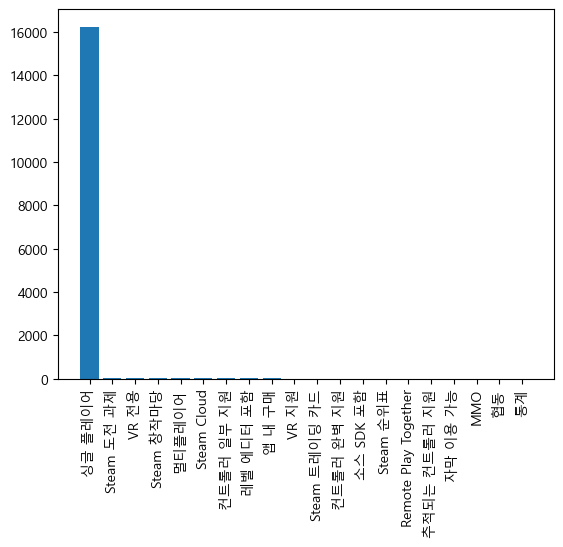

<Figure size 1000x500 with 0 Axes>

In [21]:
# 각 유니크한 값을 카운트한 데이터프레임 생성
category_count_df = pd.DataFrame(game_data_df['categories'].str.split(', ').explode().value_counts())
category_count_df = category_count_df.rename(columns={'categories': 'count'})

# unique_values 리스트에서 해당하는 값만 필터링
filtered_category_df = category_count_df[category_count_df.index.isin(unique_categories)]

# 시각화
plt.bar(filtered_category_df.index, filtered_category_df['count'])
plt.xticks(rotation=90)
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(10,5))
plt.show()

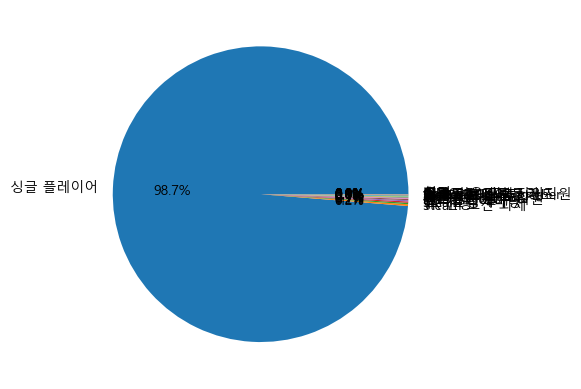

In [7]:
plt.pie(filtered_category_df['count'], labels=filtered_category_df.index, autopct='%.1f%%')
plt.show()

In [8]:
filtered_category_df

,count
싱글 플레이어,16243
Steam 도전 과제,32
VR 전용,25
Steam 창작마당,24
멀티플레이어,23
Steam Cloud,23
컨트롤러 일부 지원,16
레벨 에디터 포함,14
앱 내 구매,13
VR 지원,11


In [9]:
filtered_category_df.describe()

,count
count,20.000000
mean,822.650000
std,3629.587236
min,1.000000
25%,2.000000
50%,10.000000
75%,23.000000
max,16243.000000


## 장르

### 장르 분포

In [10]:
# 장르 6
values2 = game_data_df.iloc[:, 6].values
result2 = ','.join(values2).split(",")

In [11]:
unique_genres = set(result2)
unique_genres

{'360 동영상',
 'RPG',
 '게임 개발',
 '고어',
 '교육',
 '다큐멘터리',
 '대규모 멀티플레이어',
 '동영상 제작',
 '디자인과 일러스트레이션',
 '레이싱',
 '무료',
 '사진 편집',
 '선정적인 내용',
 '소프트웨어 교육',
 '스포츠',
 '시뮬레이션',
 '신체 노출',
 '앞서 해보기',
 '애니메이션과 모델링',
 '액션',
 '어드벤처',
 '에피소드',
 '영화',
 '오디오 제작',
 '웹 퍼블리싱',
 '유틸리티',
 '인디',
 '전략',
 '짧은 영상',
 '캐주얼',
 '튜토리얼',
 '폭력적',
 '회계 업무'}

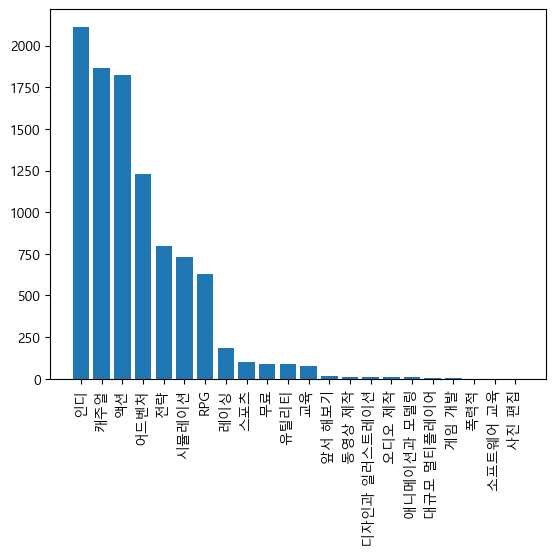

<Figure size 1000x500 with 0 Axes>

In [12]:
# 각 유니크한 값을 카운트한 데이터프레임 생성
genre_count_df = pd.DataFrame(game_data_df['genres'].str.split(', ').explode().value_counts())
genre_count_df = genre_count_df.rename(columns={'genres': 'count'})

# unique_values 리스트에서 해당하는 값만 필터링
filtered_genre_df = genre_count_df[genre_count_df.index.isin(unique_genres)]

# 시각화
plt.bar(filtered_genre_df.index, filtered_genre_df['count'])
plt.xticks(rotation=90)
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(10,5))
plt.show()

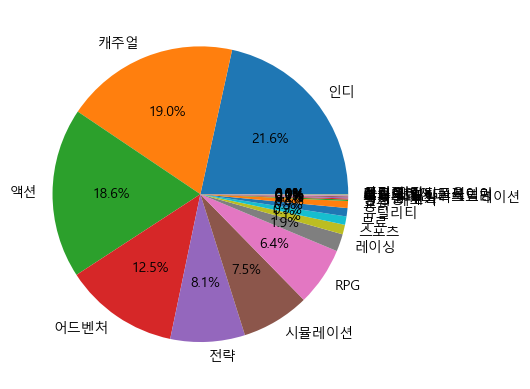

In [13]:
plt.pie(filtered_genre_df['count'], labels=filtered_genre_df.index, autopct='%.1f%%')
plt.show()

In [14]:
filtered_genre_df

,count
인디,2113
캐주얼,1864
액션,1826
어드벤처,1229
전략,799
시뮬레이션,731
RPG,626
레이싱,187
스포츠,103
무료,90


In [15]:
filtered_genre_df.describe()

,count
count,22.000000
mean,445.636364
std,691.706003
min,1.000000
25%,9.500000
50%,82.000000
75%,704.750000
max,2113.000000


## 개발사

In [16]:
game_data_df.iloc[:, 9].values

array(['DropOuts', 'Production Games Inc', 'Tigerlilly2931', ...,
       'Ghost Ship Games', 'Cosmos', 'Naelstrof'], dtype=object)

In [17]:
game_data_df['developers'] = game_data_df['developers'].astype('str')

In [18]:
# 개발사 6
developer_values = game_data_df.iloc[:, 9].values
developer_result = ','.join(developer_values).split("///")

In [19]:
unique_developers = set(developer_result)
unique_developers

{'Khadeidre Dean',
 'SimonCreative,Ixeria',
 'Valis Studios',
 'Misfit Village,Schell Games,Deceptive Games Ltd.,Ripknot Systems,BajoGames,Seth Durham,In Your Head Games LLC,4DMACAU,Experiment 7,KAIJYU-09,crowgames,Starmyth,Evil Indie Games,Ignacio Medina',
 'Vladimir Soldatov,Wolf In Motion Ltd,Studio Klondike',
 'Digital Melody,BulatHard,The Light Sword Team,Nikita "Ghost_RUS",Antizero company,Diggidy.net,Holotna,Snkl Studio,FoG Games,IR Studio,FreeCube,FreetimeStudio,Larkylabs Limited,Jens Bolanz,Boomzap Entertainment,Elephant Games,Eipix Entertainment,EleFun Games,Blue Tea Games,Fogbound,EF Universe Games LLC,Lucas Simmons',
 'Ronald Burnett,Ggaming,Empty Die Studio,Bartoš Studio,torumees games,Mad Head Games,Lunheim Studios,Francesco Fioravanti,Chime Corporation,Critique Gaming,Sloppy Studios,Noxurtica,Rogueside,HA Studio Ltd.,qrnch Tech AB,Jequed,Bee Creative Games,cys20 studio,Andreas Sheittanis,SpiffyBit,SLIDDES,PigeonDev,OperaHouse Corporation,Repa Games,Johan Bägerfeldt,Ninja

In [20]:
len(unique_developers)

5878